#Import Librabries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Import Dataset

In [3]:
BMI = pd.read_csv("/content/bmi.csv")
BMI

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


#Data Pre-Processing

In [4]:
#check dataset of rows & columns
BMI.shape

(500, 4)

In [5]:
# check first 4 rows
BMI.head(4)

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3


In [6]:
# check last 4 rows
BMI.tail()

,Gender,Height,Weight,Index
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5
499,Male,173,131,5


In [7]:
# Getting some info abount dataset
BMI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [8]:
# Statistical measure
BMI.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [9]:
# check Missing values
BMI.isnull().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [10]:
# check duplicates
BMI.duplicated().sum()

11

In [11]:
# Duplictes values
BMI[BMI.duplicated()]

,Gender,Height,Weight,Index
187,Female,182,84,3
310,Male,171,147,5
327,Female,167,85,4
355,Male,174,90,3
365,Male,141,80,5
381,Male,191,62,1
382,Male,177,117,4
395,Female,164,71,3
400,Female,195,104,3
462,Male,179,56,1


In [12]:
# Remove Duplicates
BMI.drop_duplicates(inplace=True)
BMI.shape



(489, 4)

# Data Visualization

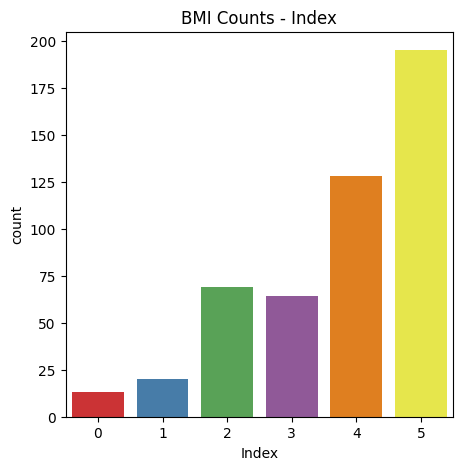

In [13]:
# BMI Counts - Index
plt.figure(figsize=(5, 5))
sns.countplot(x= 'Index',data =BMI ,palette='Set1')
plt.title("BMI Counts - Index")
plt.show()



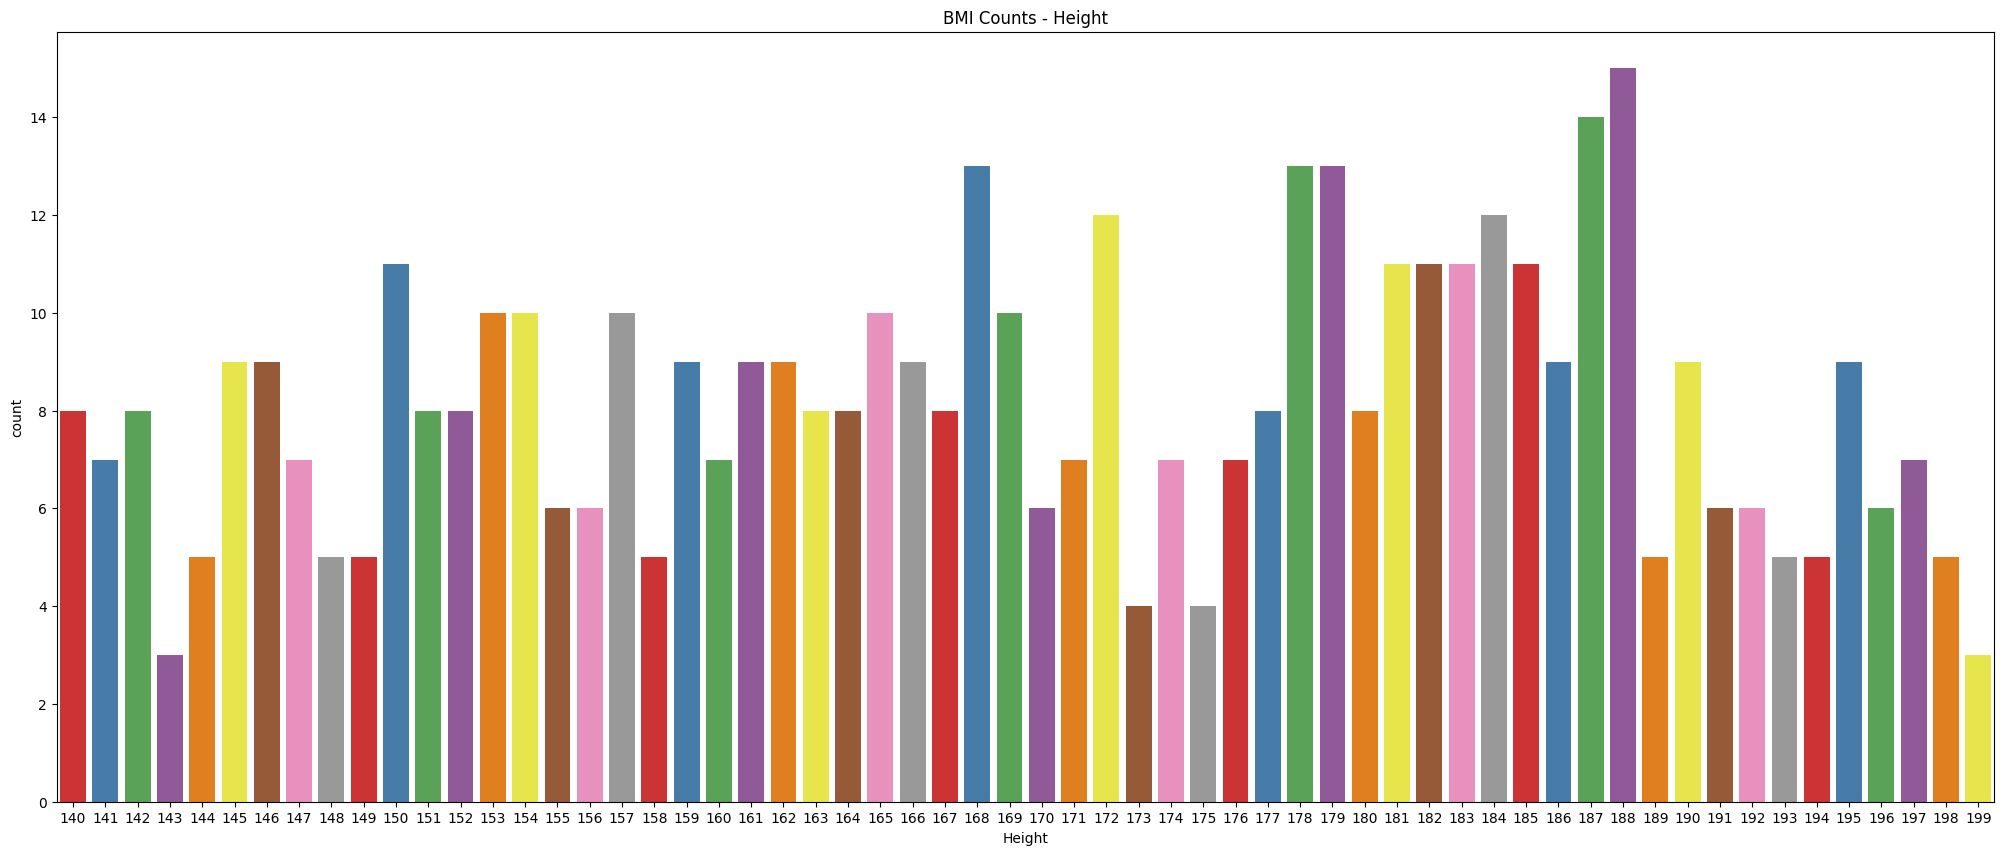

In [14]:
# BMI Counts - Height
plt.figure(figsize=(25,10))
sns.countplot(x="Height",data=BMI,palette='Set1')
plt.title("BMI Counts - Height")
plt.show()

Text(0.5, 1.0, 'BMI Counts - Weight')

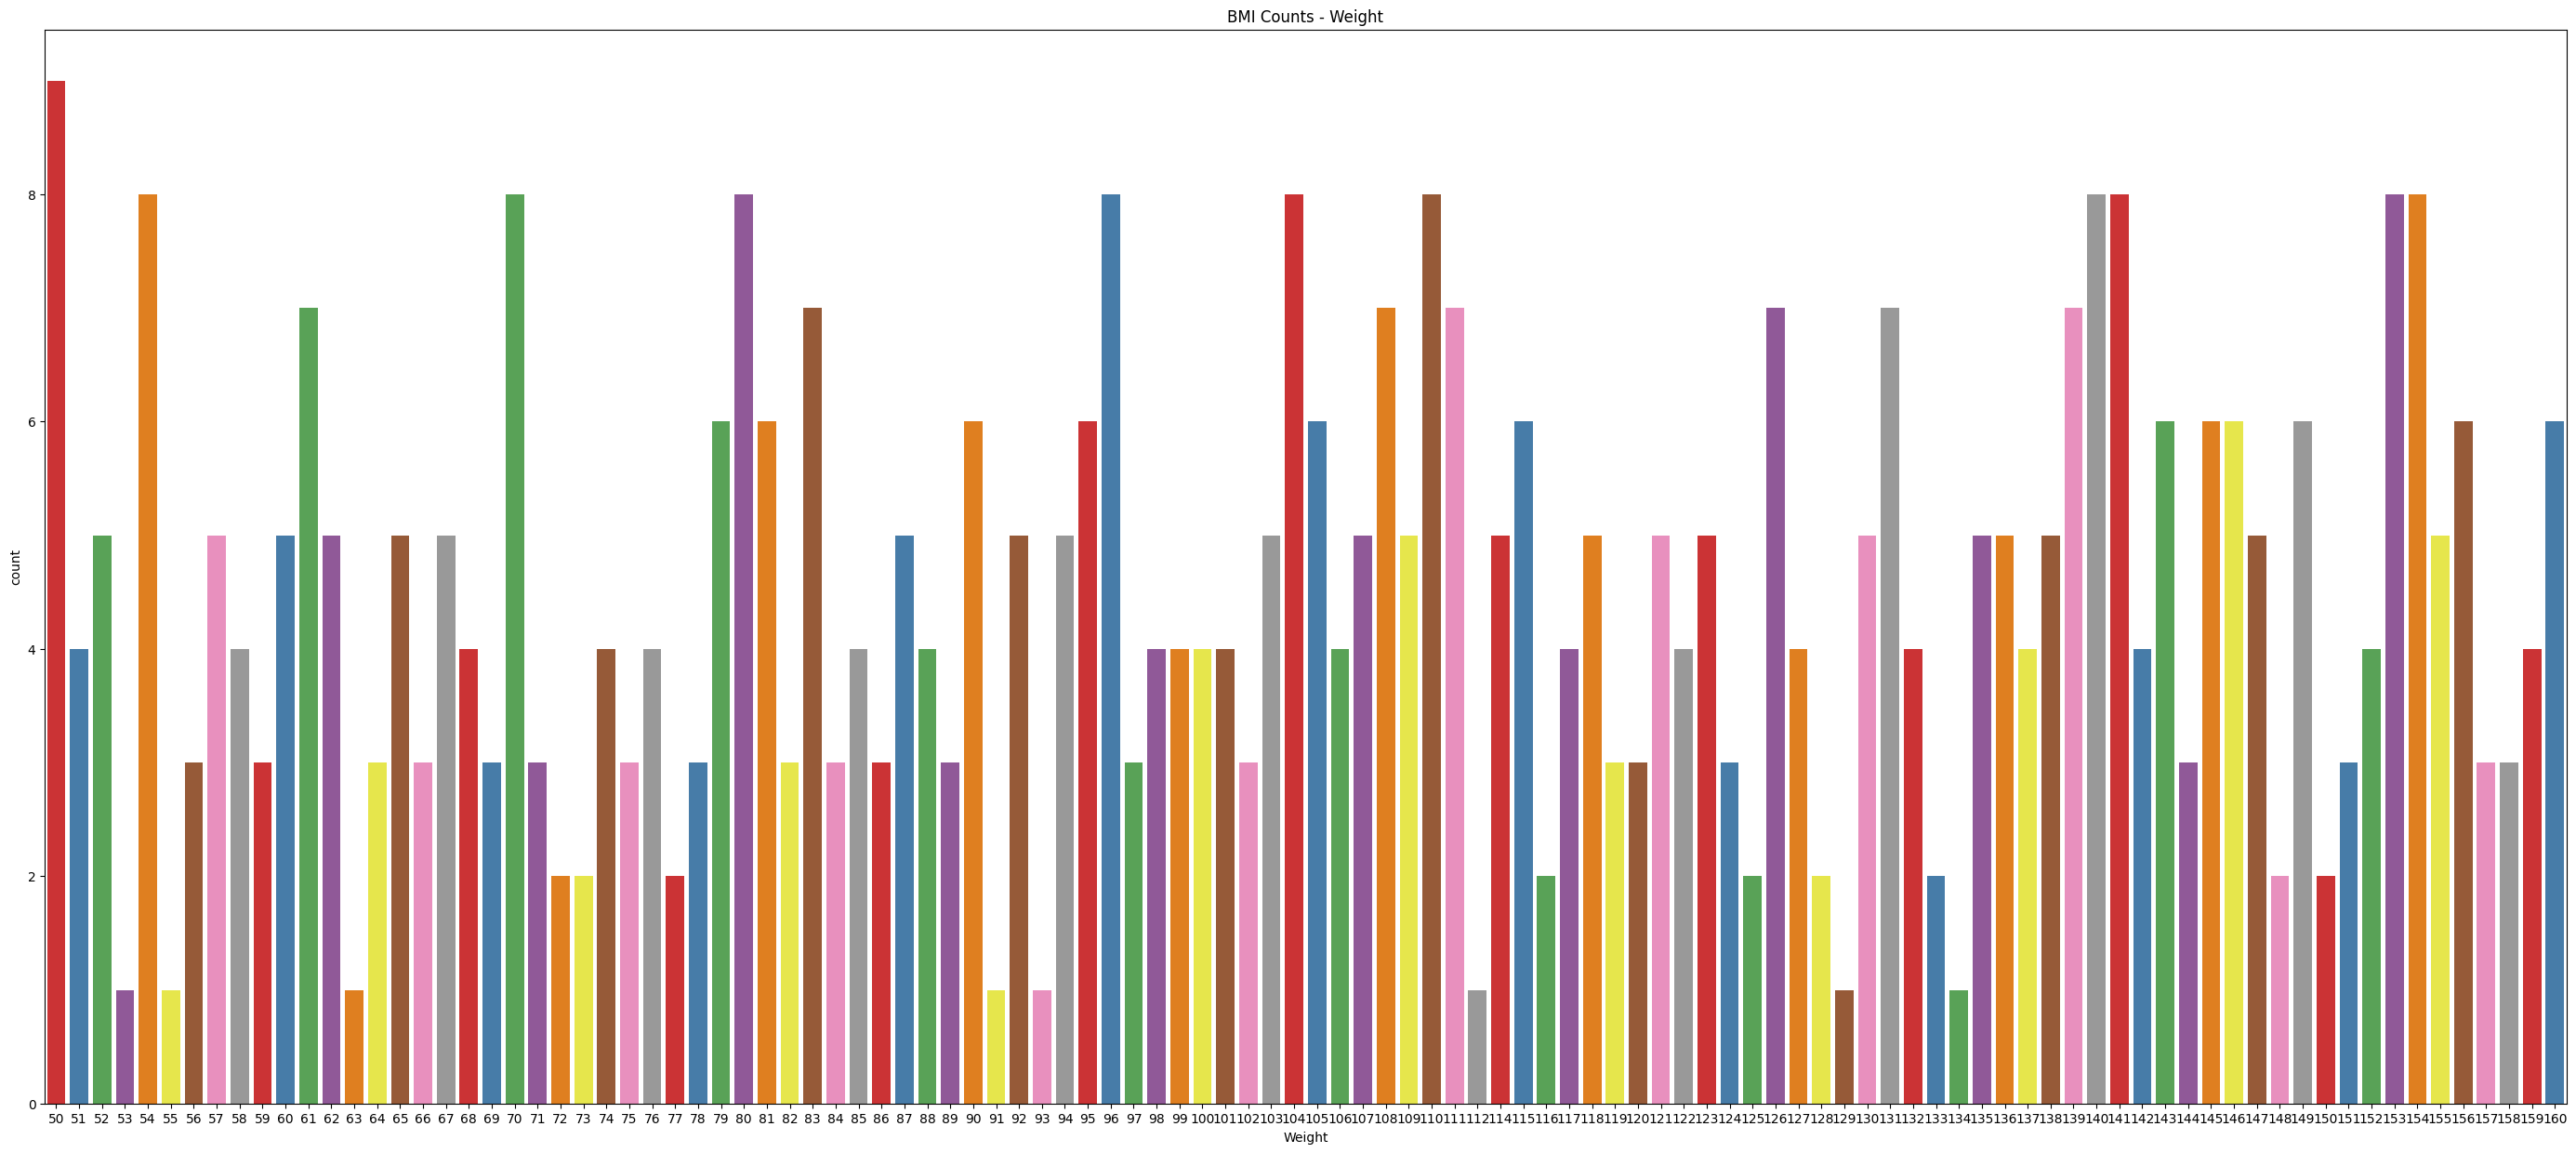

In [15]:
# BMI Counts - Weight
plt.figure(figsize=(35,15))
sns.countplot(x="Weight",data= BMI,palette = "Set1")
plt.title("BMI Counts - Weight")


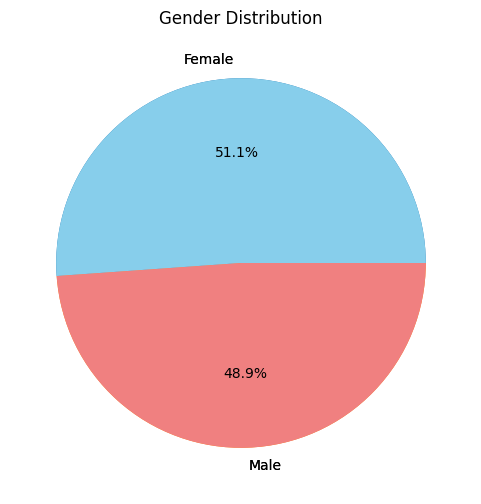

In [16]:
# Gender
gender_counts = BMI['Gender'].value_counts()
gender_counts

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index)
colors = ['skyblue', 'lightcoral']
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',colors=colors)
plt.title('Gender Distribution')
plt.show()


# Label Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
BMI['Gender'] = LE.fit_transform(BMI["Gender"])
BMI["Gender"].value_counts()

0    250
1    239
Name: Gender, dtype: int64

#Correlation

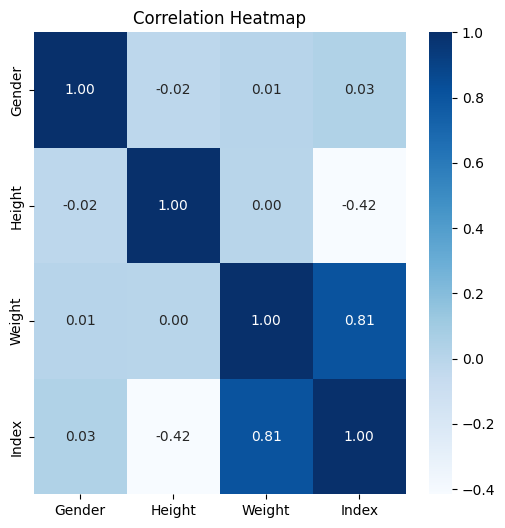

In [18]:
# Heatmap

BMI_corr = BMI.corr()
f, ax = plt.subplots(figsize=(6, 6))

sns.heatmap(BMI_corr, annot=True, fmt='.2f',cmap='Blues',annot_kws={'size': 10}, ax=ax)
plt.title('Correlation Heatmap')
plt.show()

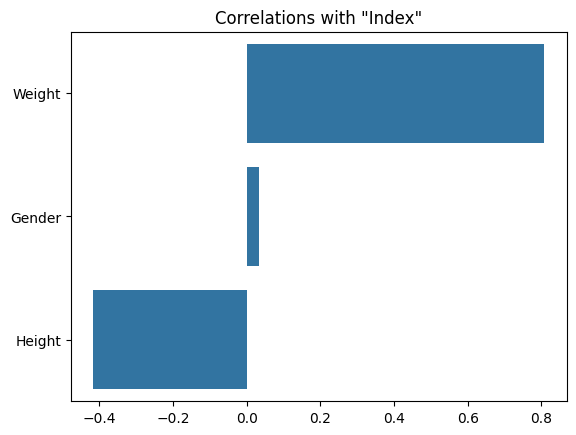

In [19]:
# Correlations with "Index"

limit = -1.0

data = BMI.corr()["Index"].sort_values(ascending=False)
indices = data.index
labels = []
corr = []
for i in range(1, len(indices)):
    if data[indices[i]]>limit:
        labels.append(indices[i])
        corr.append(data[i])
sns.barplot(x=corr, y=labels)
plt.title('Correlations with "Index"')
plt.show()

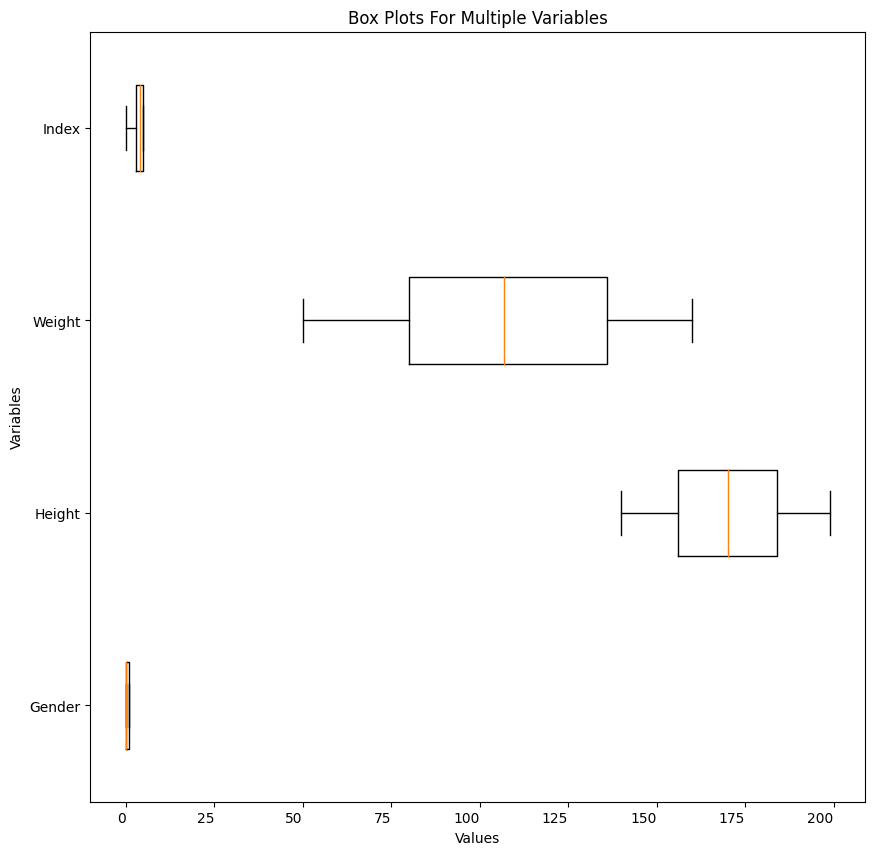

In [20]:
# check the outliers
fig,ax = plt.subplots(figsize = (10,10))
boxplot = ax.boxplot(BMI.values,vert = False,labels=BMI.columns)
plt.xticks(ha ='right')
plt.title("Box Plots For Multiple Variables")
plt.xlabel('Values')
plt.ylabel('Variables')
plt.show()

There is no outlier in data

# Splitting dataset into target & features value

In [21]:
X1 = BMI.drop(columns=['Index'],axis=1)
Y = BMI['Index']
X1

,Gender,Height,Weight
0,1,174,96
1,1,189,87
2,0,185,110
3,0,195,104
4,1,149,61
...,...,...,...
495,0,150,153
496,0,184,121
497,0,141,136
498,1,150,95


In [22]:
Y

0      4
1      2
2      4
3      3
4      3
      ..
495    5
496    4
497    5
498    5
499    5
Name: Index, Length: 489, dtype: int64

In [23]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
scaled_data = SS.fit_transform(X1)
X = pd.DataFrame(scaled_data, columns=X1.columns)
X


,Gender,Height,Weight
0,1.022754,0.249722,-0.320211
1,1.022754,1.166954,-0.597951
2,-0.977753,0.922359,0.111828
3,-0.977753,1.533847,-0.073332
4,1.022754,-1.278997,-1.400309
...,...,...,...
484,-0.977753,-1.217849,1.438805
485,-0.977753,0.861210,0.451287
486,-0.977753,-1.768188,0.914186
487,1.022754,-1.217849,-0.351071


In [24]:
# Split dataset into train & test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.2,random_state=42)
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(391, 3) (98, 3)
(391,) (98,)


# MODEL SELECTION

In [25]:
# MODEL - Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
log_model = LogisticRegression(multi_class='multinomial',solver='lbfgs')
log_model.fit(X_train, Y_train)

# accuracy on training data
X_train_prediction = log_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('LogisticRegression - Accuracy on Training data : ', training_data_accuracy)


# accuracy on test data
X_test_prediction = log_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('LogisticRegression - Accuracy score on Test Data : ', test_data_accuracy)

print("Classification Report:\n", classification_report(Y_test,X_test_prediction))
print("Confusion Matrix:\n", confusion_matrix(Y_test,X_test_prediction))


LogisticRegression - Accuracy on Training data :  0.8618925831202046
LogisticRegression - Accuracy score on Test Data :  0.9081632653061225
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      0.50      0.50         2
           2       0.75      1.00      0.86        15
           3       1.00      0.44      0.62         9
           4       0.94      0.97      0.96        34
           5       0.97      1.00      0.99        36

    accuracy                           0.91        98
   macro avg       0.69      0.65      0.65        98
weighted avg       0.90      0.91      0.89        98

Confusion Matrix:
 [[ 0  1  1  0  0  0]
 [ 0  1  1  0  0  0]
 [ 0  0 15  0  0  0]
 [ 0  0  3  4  2  0]
 [ 0  0  0  0 33  1]
 [ 0  0  0  0  0 36]]


In [26]:
# MODEL - RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, Y_train)

# accuracy on training data
X_train_pred = model.predict(X_train)
training_data_accurancy = accuracy_score(X_train_pred, Y_train)
print('RandomForest - Accuracy on Training data : ', training_data_accuracy)


# accuracy on test data
X_test_pred = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred, Y_test)
print('RandomForest - Accuracy score on Test Data : ', test_data_accuracy)

print("Classification Report:\n", classification_report(Y_test,X_test_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test,X_test_pred))

RandomForest - Accuracy on Training data :  0.8618925831202046
RandomForest - Accuracy score on Test Data :  0.826530612244898
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.25      0.50      0.33         2
           2       0.79      0.73      0.76        15
           3       0.78      0.78      0.78         9
           4       0.90      0.79      0.84        34
           5       0.85      0.94      0.89        36

    accuracy                           0.83        98
   macro avg       0.76      0.71      0.71        98
weighted avg       0.84      0.83      0.83        98

Confusion Matrix:
 [[ 1  0  1  0  0  0]
 [ 0  1  1  0  0  0]
 [ 0  3 11  1  0  0]
 [ 0  0  1  7  1  0]
 [ 0  0  0  1 27  6]
 [ 0  0  0  0  2 34]]


In [27]:
# MODEL - SUPPORT VECTOR MACHINE
from sklearn import svm
classifier = svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(X_train,Y_train)

# accuracy on training data
X_train_pred1 = classifier.predict(X_train)
train_data_accurancy = accuracy_score(X_train_pred1, Y_train)
print('SVM - Accuracy on Training data : ', train_data_accurancy)


# accuracy on test data
X_test_pred1 = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred1, Y_test)
print('SVM - Accuracy score on Test Data : ', test_data_accuracy)


SVM - Accuracy on Training data :  0.9514066496163683
SVM - Accuracy score on Test Data :  0.8673469387755102


In [28]:
# MODEL - Decision Tree
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train, Y_train)

# accuracy on training data
X_train_pred2 = dtree.predict(X_train)
training_data_accuracy = accuracy_score(X_train_pred2, Y_train)
print('Decision Tree - Accuracy on Training data : ', training_data_accuracy)


# accuracy on test data
X_test_pred2 = dtree.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred2, Y_test)
print('Decision Tree - Accuracy score on Test Data : ', test_data_accuracy)

print("Classification Report:\n", classification_report(Y_test,X_test_pred2))
print("Confusion Matrix:\n", confusion_matrix(Y_test,X_test_pred2))



Decision Tree - Accuracy on Training data :  1.0
Decision Tree - Accuracy score on Test Data :  0.8061224489795918
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.33      0.50      0.40         2
           2       0.75      0.80      0.77        15
           3       0.67      0.67      0.67         9
           4       0.84      0.76      0.80        34
           5       0.87      0.92      0.89        36

    accuracy                           0.81        98
   macro avg       0.74      0.69      0.70        98
weighted avg       0.81      0.81      0.81        98

Confusion Matrix:
 [[ 1  0  1  0  0  0]
 [ 0  1  1  0  0  0]
 [ 0  2 12  1  0  0]
 [ 0  0  1  6  2  0]
 [ 0  0  1  2 26  5]
 [ 0  0  0  0  3 33]]


In [29]:
# MODEL - k-Nearest Neighbors (kNN)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

# accuracy on training data
X_train_pred3 = knn.predict(X_train)
train_accuracy = accuracy_score(X_train_pred3,Y_train)
print("KNN - Training Accuracy :", train_accuracy)

# accuracy on test data
X_test_pred3 = knn.predict(X_test)
test_accuracy = accuracy_score(X_test_pred3,Y_test)
print("KNN - Test Accuracy :", test_accuracy)

print("Classification Report:\n", classification_report(Y_test,X_test_pred3))
print("Confusion Matrix:\n", confusion_matrix(Y_test,X_test_pred3))

KNN - Training Accuracy : 0.9258312020460358
KNN - Test Accuracy : 0.8061224489795918
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.17      0.50      0.25         2
           2       0.73      0.73      0.73        15
           3       0.58      0.78      0.67         9
           4       0.93      0.74      0.82        34
           5       0.92      0.97      0.95        36

    accuracy                           0.81        98
   macro avg       0.56      0.62      0.57        98
weighted avg       0.83      0.81      0.81        98

Confusion Matrix:
 [[ 0  1  1  0  0  0]
 [ 0  1  1  0  0  0]
 [ 0  4 11  0  0  0]
 [ 0  0  1  7  1  0]
 [ 0  0  1  5 25  3]
 [ 0  0  0  0  1 35]]


In [30]:
data = {
    'Model': ['Logistic Regression', 'Random Forest', 'Support Vector Machine (SVM)', 'Decision Tree', 'k-Nearest Neighbors (kNN)'],
    'Training Accuracy': [86.19, 86.19, 95.14, 100.00, 92.58],
    'Test Accuracy': [90.82, 84.69, 86.73, 80.61, 80.61]
}

df = pd.DataFrame(data)
df

,Model,Training Accuracy,Test Accuracy
0,Logistic Regression,86.19,90.82
1,Random Forest,86.19,84.69
2,Support Vector Machine (SVM),95.14,86.73
3,Decision Tree,100.00,80.61
4,k-Nearest Neighbors (kNN),92.58,80.61


The Logistic Regression model is a good fit for the dataset as it performs well on both the training and test data